In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_bpine_tfidf.csv")

In [3]:
df_rf.columns.to_list()

['index',
 'tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',

Splitting dependent and independent variables

In [4]:
X = df_rf.drop(['index', 'X..Beta-Pinene'], axis = 1)
y = df_rf[['X..Beta-Pinene']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.01666667],
       [0.01666667],
       [0.01666667],
       ...,
       [0.00333333],
       [0.00333333],
       [0.00333333]])

<Axes: ylabel='Count'>

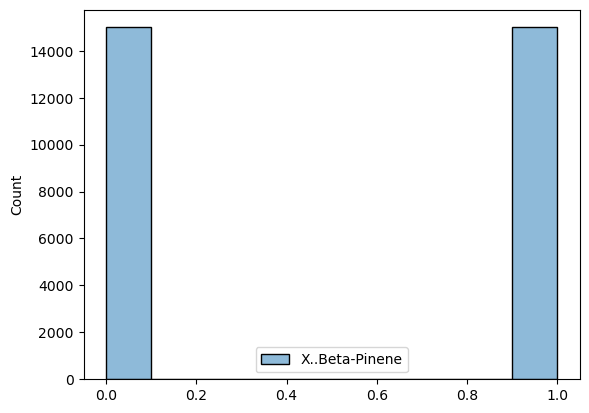

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_87785/350139188.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor()

In [10]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_rfreg)

0.019634595212711353

In [12]:
mean_squared_error(y_val, y_pred_rfreg)

0.008715950124610676

In [13]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.09335925302084778

In [14]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9904601455440815

In [15]:
#val
r2_score(y_val, y_pred_rfreg)

0.9646302446249839

Residual plots for each target variable

Feature Selection

In [16]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [17]:
df_feat

,features,score
0,tfidf_0,0.000035
1,tfidf_1,0.000276
2,tfidf_2,0.000855
3,tfidf_3,0.000034
4,tfidf_4,0.000118
...,...,...
464,tree,0.000340
465,tropical,0.000267
466,vanilla,0.001693
467,violet,0.000116


In [18]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [19]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
389,indica,5.912507e-01
426,blueberry,4.268550e-02
309,tfidf_309,1.130450e-02
29,tfidf_29,7.991770e-03
270,tfidf_270,6.188045e-03
329,tfidf_329,5.184732e-03
181,tfidf_181,4.905887e-03
39,tfidf_39,4.075168e-03
333,tfidf_333,3.755611e-03
340,tfidf_340,3.744376e-03


In [20]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [21]:
selector.estimator_.feature_importances_

array([5.70884334e-05, 3.16618255e-04, 9.13401215e-04, 2.23135022e-05,
       9.04077317e-05, 8.30241912e-04, 1.31780560e-03, 3.24411874e-03,
       1.97813995e-05, 6.01454040e-04, 1.38274223e-04, 5.27651138e-04,
       1.22350624e-04, 1.51994360e-04, 1.46381746e-03, 4.76309514e-04,
       6.84021216e-04, 1.03226698e-03, 1.37861641e-04, 1.38247263e-05,
       1.45299067e-03, 4.57089101e-04, 8.83535705e-04, 3.52699985e-04,
       1.64888500e-03, 1.21388764e-04, 3.94280998e-04, 3.25922653e-04,
       5.30940927e-04, 7.92940674e-03, 1.16527542e-03, 1.01545206e-04,
       2.11109537e-03, 3.62335380e-04, 6.30078424e-04, 6.85670128e-04,
       7.90413336e-04, 1.27558722e-03, 1.85834675e-04, 4.08089064e-03,
       9.19625282e-04, 7.72742151e-04, 1.16770348e-04, 9.72040584e-04,
       7.16865160e-04, 1.63876550e-04, 1.11508893e-03, 2.38928928e-05,
       6.31063933e-04, 1.74708380e-04, 2.12346878e-04, 8.92051125e-04,
       2.80622241e-04, 8.33205755e-05, 5.84217781e-04, 1.42857759e-03,
      

In [22]:
selector.threshold_

0.0021321961620469083

In [23]:
mask = selector.get_support()

In [24]:
mask

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False,  True, False, False, False,  True,
       False, False,

In [25]:
selected_features = X.columns[mask]

In [26]:
selected_X = df_rf[selected_features]
selected_X

,tfidf_7,tfidf_29,tfidf_39,tfidf_57,tfidf_84,tfidf_105,tfidf_117,tfidf_119,tfidf_121,tfidf_125,...,tfidf_310,tfidf_312,tfidf_329,tfidf_333,tfidf_340,tfidf_347,indica,blueberry,grape,woody
0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.165248,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0,0,0
1,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,...,0.208564,0.000000,0.077150,0.0,0.0,0.0,0,0,0,0
2,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.104649,0.000000,0.0,0.0,0.0,0,0,0,0
3,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.117085,0.0,0.0,0.0,0,0,0,0
4,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.178640,0.0,...,0.000000,0.163848,0.120848,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.261458,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.179750,0.132576,0.0,0.0,0.0,1,0,0,0
29996,0.000000,0.0,0.0,0.0,0.46193,0.0,0.0,0.288772,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0,0,0
29997,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0,0,0
29998,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0,0,0


Train test split (after Feature Selection)

In [27]:
import joblib

joblib.dump(selector, "selector_rf_tfidf_bpine.pkl")
joblib.dump(selected_X, "selected_X_rf_tfidf_bpine.pkl")

['selected_X_rf_tfidf_bpine.pkl']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [29]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [30]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_87785/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [31]:
mean_absolute_error(y_val, y_pred_rfreg)

0.038469457028765475

In [32]:
mean_squared_error(y_val, y_pred_rfreg)

0.019610779665691542

In [33]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.1400384935140747

In [34]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9470996999272758

In [35]:
#val
r2_score(y_val, y_pred_rfreg)

0.9204150016458742

Hyperparameter Tuning

In [36]:
parameters = {'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [37]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [38]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/li

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [39]:
rscv.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

In [40]:
joblib.dump(rscv, "rscv_rf_tfidf_bpine.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_tfidf_best_params_bpine.pkl")

['rscv_rf_tfidf_best_params_bpine.pkl']

RF (after Hyperparameter Tuning)

In [41]:
rfreg_ht = RandomForestRegressor(n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto', max_depth = None)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_87785/2891017253.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [42]:
mean_absolute_error(y_val, y_pred_rfreg)

0.038352897158034756

In [43]:
mean_squared_error(y_val, y_pred_rfreg)

0.019499274001835206

In [44]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.1396398009230721

In [45]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9471844916270884

In [46]:
#val
r2_score(y_val, y_pred_rfreg)

0.9208675169576447

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [47]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [48]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_tfidf_bpine.pkl")
joblib.dump(y_test, "y_test_rfreg_tfidf_bpine.pkl")

['y_test_rfreg_tfidf_bpine.pkl']

In [49]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.03980838126485927

In [50]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.019501204295620432

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.13964671244114713

In [52]:
r2_score(y_test, y_pred_rfreg_test)

0.9208369357291618

Error analysis

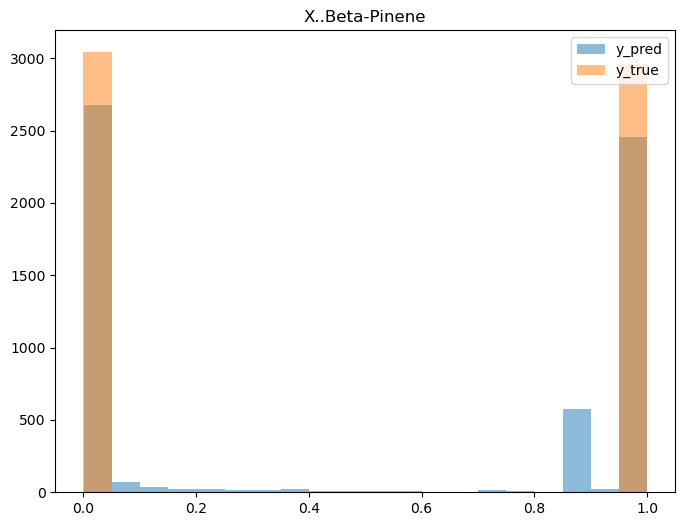

<Figure size 640x480 with 0 Axes>

In [53]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Beta-Pinene"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_bpine.png')

Pearson R

In [54]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.960
P-value: 0.000


<Axes: >

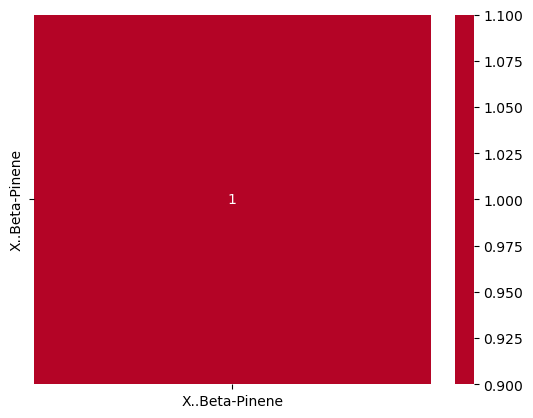

In [55]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)